# ЛБ #4

## Инициализация

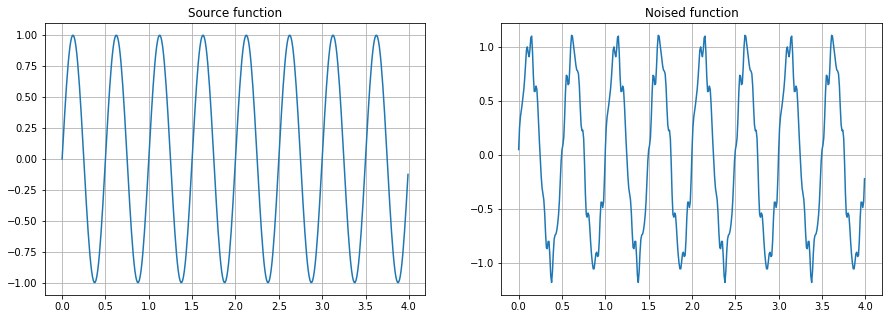

In [1]:
%matplotlib inline
import numpy as sp
import pylab as pl
import cmath as cm

def source_function(x):
    return x #sp.sin(3*x) * x - x*x

source_function = lambda x: sp.sin(2 * sp.pi * 2 * x) #(lambda x: sp.sin(6*x) + sp.cos(5*x))
noise_function = lambda x: 0.1 * sp.sin(2 * sp.pi * 15 * x) + 0.05 * sp.sin(2 * sp.pi * 10 * x) + 0.05 * sp.cos(2 * sp.pi * 20 * x)
result_function = lambda x: source_function(x) + noise_function(x)
source_function_period = 4.0
N = 400
#source_x = sp.arange(0, source_function_period, (source_function_period/N))
result_x = sp.arange(0, N, 1)

source_x = sp.arange(0, source_function_period, (source_function_period/N))
source_y = sp.vectorize(source_function)(source_x)
noise_y = sp.vectorize(result_function)(source_x)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(source_x, source_y)
pl.title("Source function")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(source_x, noise_y)
pl.title("Noised function")
pl.grid()
pl.show()


## Характеристика

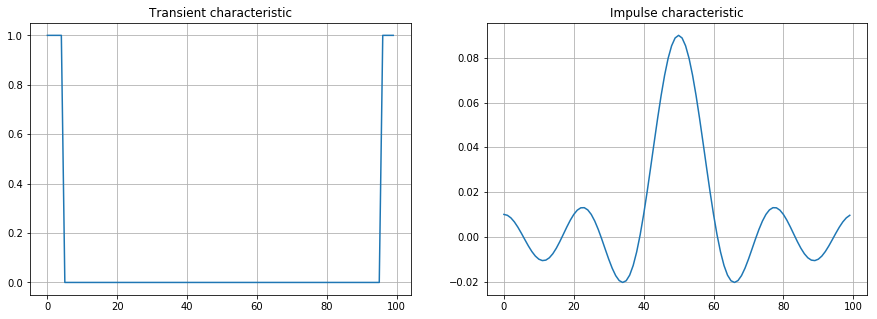

In [2]:
filter_power = 100#N/(2*(int)(source_function_period))

def reverse_transformation(data):
    result = []
    n = len(data)
    for i in range(n):
        result.append(0)
        for j in range(n):
            result[i] += data[j] * sp.cos(2 * sp.pi * i * (-j)/float(n))
    return sp.roll([x/n for x in result], int(n/2))

def transient_characteristic(x, bandwith = 5, power = filter_power):
    if (x < bandwith or (x > power-bandwith and x < power)):
    #if (x < bandwith):
        return 1
    else:
        return 0

fourier_x = sp.arange(0, filter_power, 1)
transient_y = sp.vectorize(transient_characteristic)(fourier_x)

impulse_y = reverse_transformation(transient_y)

# noise_y = sp.vectorize(result_function)(source_x)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(fourier_x, transient_y)
pl.title("Transient characteristic")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(fourier_x, impulse_y)
pl.title("Impulse characteristic")
pl.grid()

pl.show()

## Проверка

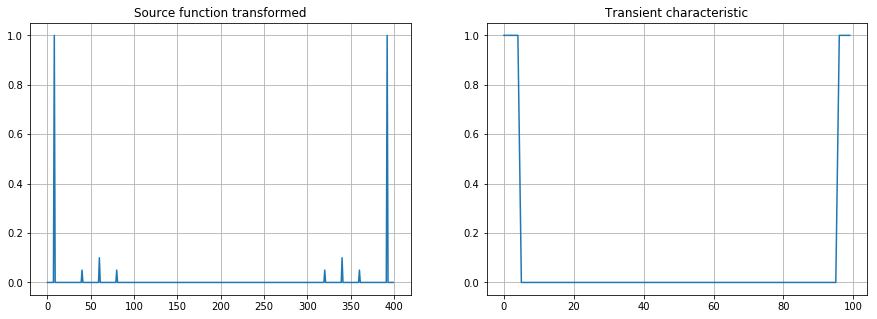

In [6]:
def discrete_transformation(data):
    n = len(data)
    discrete_result = [0] * n
    for i in range(n):
        for j in range(n):
            discrete_result[i] += complex(
                sp.cos(2 * sp.pi * i * (j/float(n))), 
                sp.sin(2 * sp.pi * i * (j/float(n)))
            ) * data[j]
    return [abs(x) for x  in discrete_result].


source_fourier_x = sp.arange(0, N, 1)
source_reverse_y = list(map(lambda x: x/(N/2), discrete_transformation(noise_y)))

impulse_discrete_reversed = discrete_transformation(impulse_y)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(source_fourier_x, source_reverse_y)
pl.title("Source function transformed")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(fourier_x, impulse_discrete_reversed)
pl.title("Transient characteristic")
pl.grid()
pl.show()

## КИХ фильтр

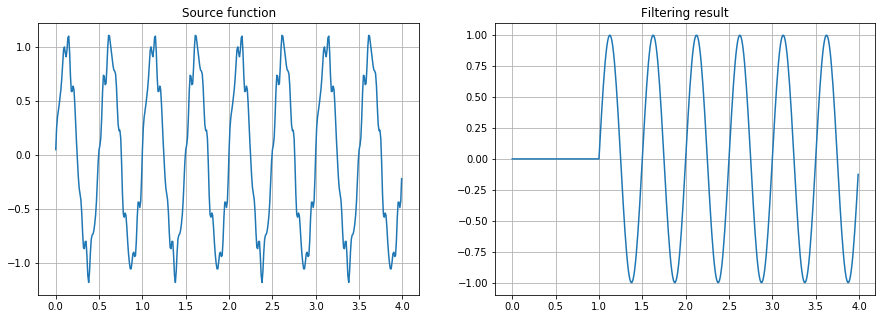

In [4]:
def convolution(f, g, N, M):
    con = [0] * N
    for i in range(M, (int)(N)):
        for j in range(min(i, M)):
#             print("i: %d, j: %d" % (i, j))
            f_x = (i-j)
            con[i] += f[f_x] * g[j]
    return [x for x in con]

filtering_result = convolution(noise_y, impulse_y, N, filter_power)

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(source_x, noise_y)
pl.title("Source function")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(source_x, filtering_result)
pl.title("Filtering result")
pl.grid()
pl.show()

# БИХ фильтр

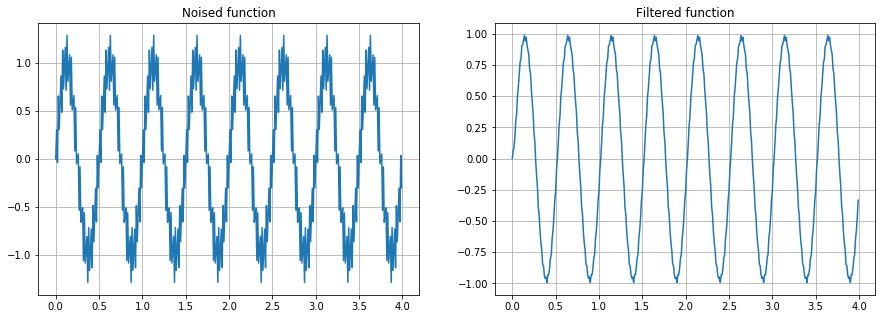

In [5]:
x = sp.vectorize(lambda x: source_function(x) + 0.3 * sp.sin(2 * sp.pi * 40 * x))(source_x)
y = list(range(N))

RC = 2.0 * sp.pi * 8
dt = 1.0/(N/source_function_period)
tau = 1.0/(RC)
alpha = dt / (dt + 2*tau)
 
for i in range(1, N):
    y[i] = alpha*(x[i]+x[i-1]) + (1-2*alpha)*y[i-1]

pl.figure(figsize = (15 , 5))

pl.subplot(1, 2, 1)
pl.plot(source_x, x)
pl.title("Noised function")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(source_x, y)
pl.title("Filtered function")
pl.grid()
pl.show()

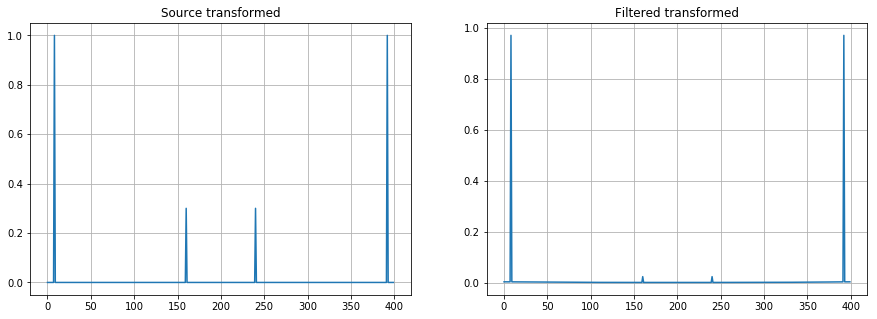

In [25]:
bih_ach_n = 15
source_fourier_x = sp.arange(0, N, 1)
bih_fourier_x = sp.arange(0, bih_ach_n, 1)
bih_ach = sp.vectorize(lambda x: 1 / ((1 + (x*RC)**2) ** 0.5))(bih_fourier_x)

x_reverse = list(map(lambda x: x/(N/2), discrete_transformation(x)))
y_reverse = list(map(lambda x: x/(N/2), discrete_transformation(y)))

pl.figure(figsize = (15 , 5))

# pl.subplot(2, 2, 1)
# pl.plot(bih_fourier_x, bih_ach)
# pl.title("ACH")
# pl.grid()

pl.subplot(1, 2, 1)
pl.plot(source_fourier_x, x_reverse)
pl.title("Source transformed")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(source_fourier_x, y_reverse)
pl.title("Filtered transformed")
pl.grid()
pl.show()